## Setup

In [1]:
from pathlib import Path

import pandas as pd


In [2]:
data_path = Path("..") / "data" / "raw"
data_path


PosixPath('../data/raw')

## Custom Functions

In [3]:
def see_missing(df: pd.DataFrame, only_missing: bool = False) -> pd.DataFrame:
    """Show the number and percentage of missing values in each column"""
    total_missing = df.isnull().sum().values
    percent_missing = total_missing * 100 / len(df)

    df_missing_info = pd.DataFrame(
        {
            "columns": df.columns,
            "total_missing": total_missing,
            "percent_missing": percent_missing,
        }
    )
    df_missing_info = df_missing_info.sort_values(
        "percent_missing", ascending=False, ignore_index=True
    )

    if only_missing:
        return df_missing_info.query("total_missing > 0")
    return df_missing_info

In [4]:
def get_freq_table(df: pd.DataFrame, col: str) -> pd.DataFrame:
    """Get the count and percentage of each unique value in the column"""
    num_count = df[col].value_counts()
    perc_count = df[col].value_counts(normalize=True)
    df_sum = pd.concat([num_count, perc_count], axis=1)
    df_sum.columns = ["count", "percentage"]
    return df_sum

## Training Set

In [5]:
df_train = pd.read_csv(data_path / "train.csv")


In [6]:
df_train.shape


(1804874, 45)

In [7]:
df_train.head()


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [8]:
df_train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [9]:
df_train["comment_text"][0]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

In [10]:
(
    df_train["comment_text"]
    .str.split()
    .apply(len)
    .describe()
    .reset_index()
    .rename({"index": "staistics", "text": "value"}, axis=1)
    .round(3)
)


,staistics,comment_text
0,count,1804874.000
1,mean,51.277
2,std,46.178
3,min,1.000
4,25%,16.000
5,50%,35.000
6,75%,72.000
7,max,317.000


<AxesSubplot:>

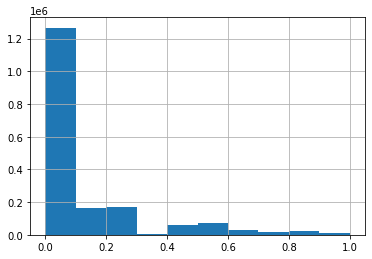

In [11]:
df_train.target.hist()


In [12]:
df_train['label']  = (df_train.target >= 0.5).astype(int)

In [13]:
get_freq_table(df_train, 'label')

,count,percentage
0,1660540,0.920031
1,144334,0.079969


In [14]:
see_missing(df_train, only_missing=True)

,columns,total_missing,percent_missing
0,other_disability,1399744,77.553558
1,hindu,1399744,77.553558
2,white,1399744,77.553558
3,transgender,1399744,77.553558
4,psychiatric_or_mental_illness,1399744,77.553558
5,physical_disability,1399744,77.553558
6,other_sexual_orientation,1399744,77.553558
7,other_religion,1399744,77.553558
8,other_race_or_ethnicity,1399744,77.553558
9,other_gender,1399744,77.553558


In [15]:
df_train.query("asian == 1").iloc[0, 2]

'Not a good idea, considering that the elephants at the zoo are Asian elephants.'

## Test Set

In [16]:
df_test = pd.read_csv(data_path / "test.csv")


In [17]:
df_test.shape

(97320, 2)

In [18]:
df_test.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...
